# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import shap


# Data formatting

In [2]:
df = pd.read_csv('StudentsPerformanceExploite.csv') # Load the data
np.random.seed(0)

In [3]:
enc = preprocessing.OneHotEncoder()
X =  df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']]
enc.fit(X)
cat = enc.categories_
a = enc.transform(X).toarray()
column_name = enc.get_feature_names()
one_hot_encoded_frame =  pd.DataFrame(a, columns= column_name)

In [4]:
# The target variable is 'average'.
Y = df['average']

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(one_hot_encoded_frame, Y, test_size = 0.2)

# Train the model

In [5]:
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

# SHAP

## Features importance

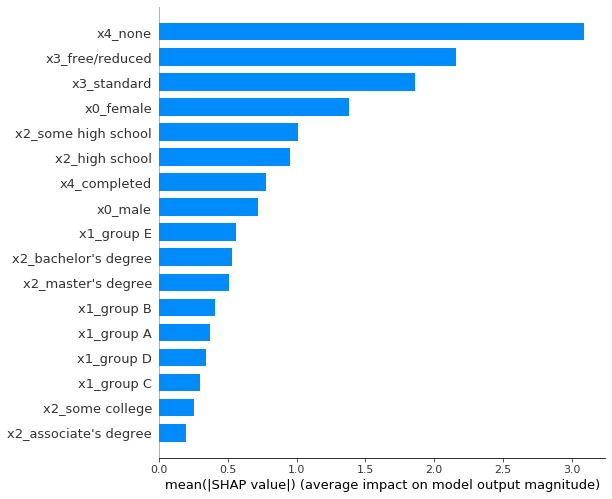

In [12]:
explainerModel = shap.TreeExplainer(model)
shap_values = explainerModel.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

## Features impact

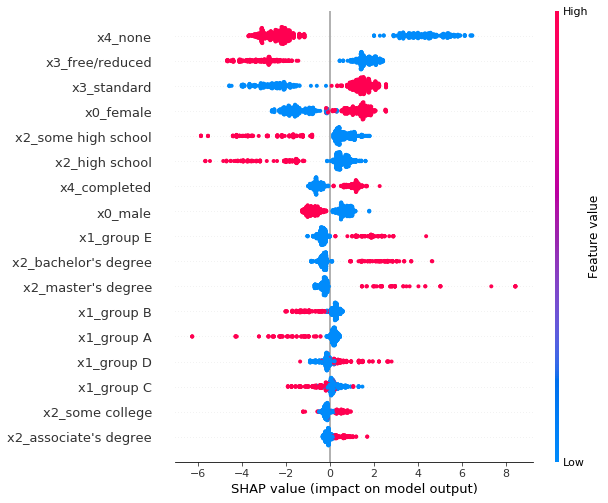

In [13]:
f = plt.figure()
shap.summary_plot(shap_values, X_train)

## Global interpretability for 'female' feature

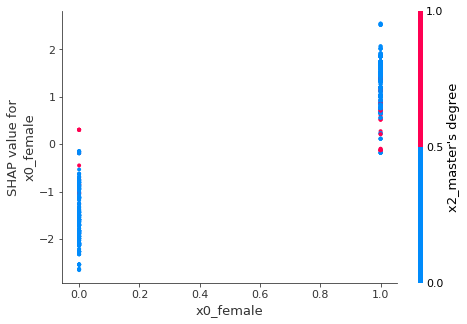

In [14]:
shap.dependence_plot('x0_female', shap_values, X_train)

## Local interpretability for the first instance

In [23]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    p = shap.force_plot(explainerModel.expected_value, shap_values[j], X_train.iloc[[j]])
    return(p)

shap_plot(0)